In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df  = pd.read_csv('C:/Users/sumee/Dropbox/PC/Downloads/minihomeprices.csv')


# show first five rows
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [7]:
# Descriptiion of our data set

df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [8]:
#  to know how many null values

df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [9]:
# fill null values with median value

df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )

#  here we can use inplace=True as well.  both are valid for update data frame

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


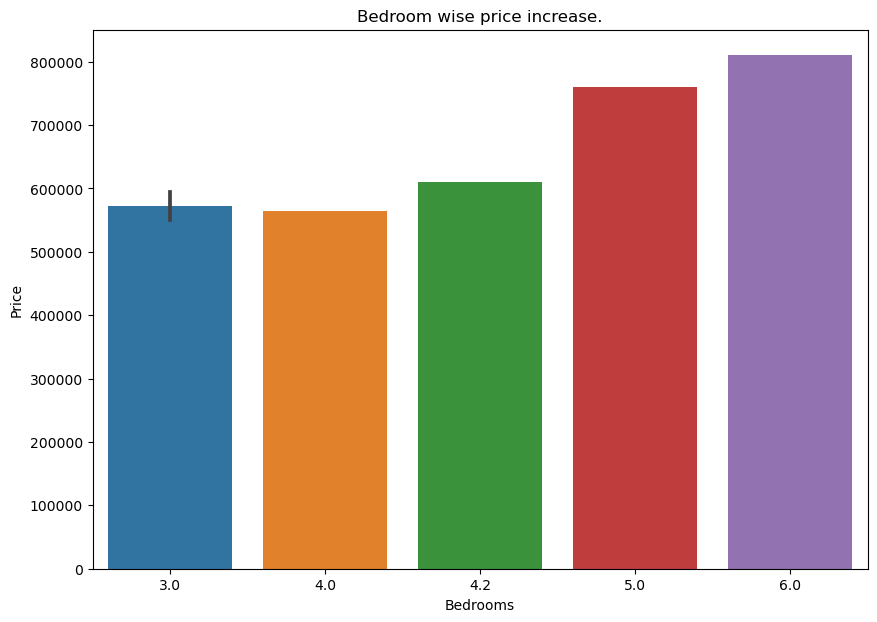

In [10]:
# barploat show

plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('bedrooms', 'price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

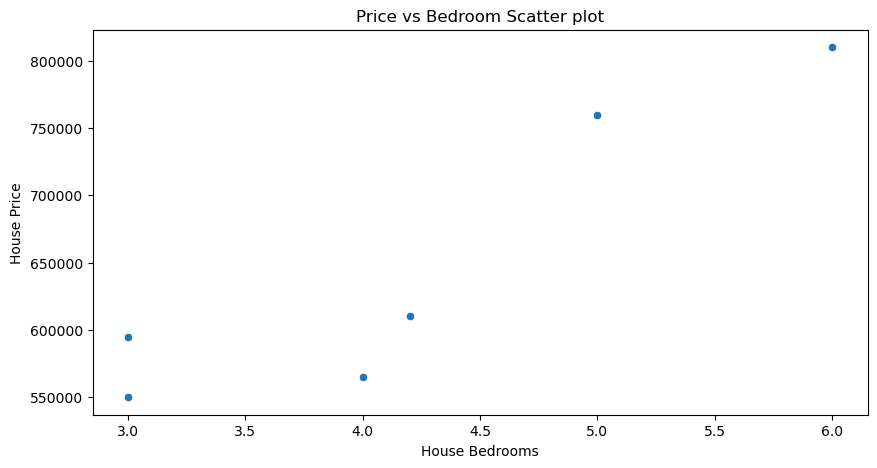

In [11]:
# Scatter plot
plt.figure(figsize=(10, 5))

sns.scatterplot('bedrooms', 'price',data=df)
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

<Figure size 1000x700 with 0 Axes>

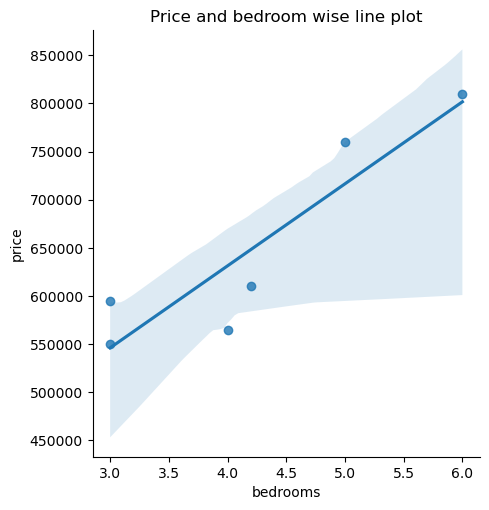

In [12]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

In [13]:
# import model 
from sklearn.linear_model import LinearRegression

In [15]:
mdl = LinearRegression()

In [16]:
#  Set dependent and independent variables

X = df.drop(['price'], axis=1)
y = df['price']

In [17]:
df['bedrooms'] = df['bedrooms'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [18]:
#  shows the variables
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [19]:
#  Fitting Model

mdl.fit( X, y  )

LinearRegression()

In [21]:
# Now custimize prediction testing

mdl.predict([[ 4000, 2, 50 ]])

array([551989.04870256])

In [22]:
mdl.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [23]:
mdl.intercept_

231586.00639409182

In [24]:
#  know score 
score = mdl.score( X, y )

print(score * 100)

95.40926625396438
